In [1]:
import numpy as np   
np.random.seed(42)   ## so that output would be same
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import Dense
#Evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score



# data processing 

In [2]:
data = pd.read_csv("diabetes.csv")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [3]:
data[["Glucose",  "BloodPressure","SkinThickness","Insulin","BMI"]]=data[["Glucose",  "BloodPressure","SkinThickness","Insulin","BMI"]].replace(0,np.nan)

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB
None


In [5]:
l=["Glucose",  "BloodPressure","SkinThickness","Insulin","BMI"]
def median_target(var):   
    temp = data[data[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp
for ele in l:
    print(median_target(ele))

   Outcome  Glucose
0        0    107.0
1        1    140.0
   Outcome  BloodPressure
0        0           70.0
1        1           74.5
   Outcome  SkinThickness
0        0           27.0
1        1           32.0
   Outcome  Insulin
0        0    102.5
1        1    169.5
   Outcome   BMI
0        0  30.1
1        1  34.3


In [6]:
data.loc[(data['Outcome'] == 0 ) & (data['BMI'].isnull()), 'BMI'] = 30.1
data.loc[(data['Outcome'] == 1 ) & (data['BMI'].isnull()), 'BMI'] = 34.3
data.loc[(data['Outcome'] == 0 ) & (data['BloodPressure'].isnull()), 'BloodPressure'] = 70
data.loc[(data['Outcome'] == 1 ) & (data['BloodPressure'].isnull()), 'BloodPressure'] = 74.5
data.loc[(data['Outcome'] == 0 ) & (data['SkinThickness'].isnull()), 'SkinThickness'] = 27
data.loc[(data['Outcome'] == 1 ) & (data['SkinThickness'].isnull()), 'SkinThickness'] = 32
data.loc[(data['Outcome'] == 0 ) & (data['Glucose'].isnull()), 'Glucose'] = 107
data.loc[(data['Outcome'] == 1 ) & (data['Glucose'].isnull()), 'Glucose'] = 140
data.loc[(data['Outcome'] == 0 ) & (data['Insulin'].isnull()), 'Insulin'] = 102.5
data.loc[(data['Outcome'] == 1 ) & (data['Insulin'].isnull()), 'Insulin'] = 169.5

In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB
None


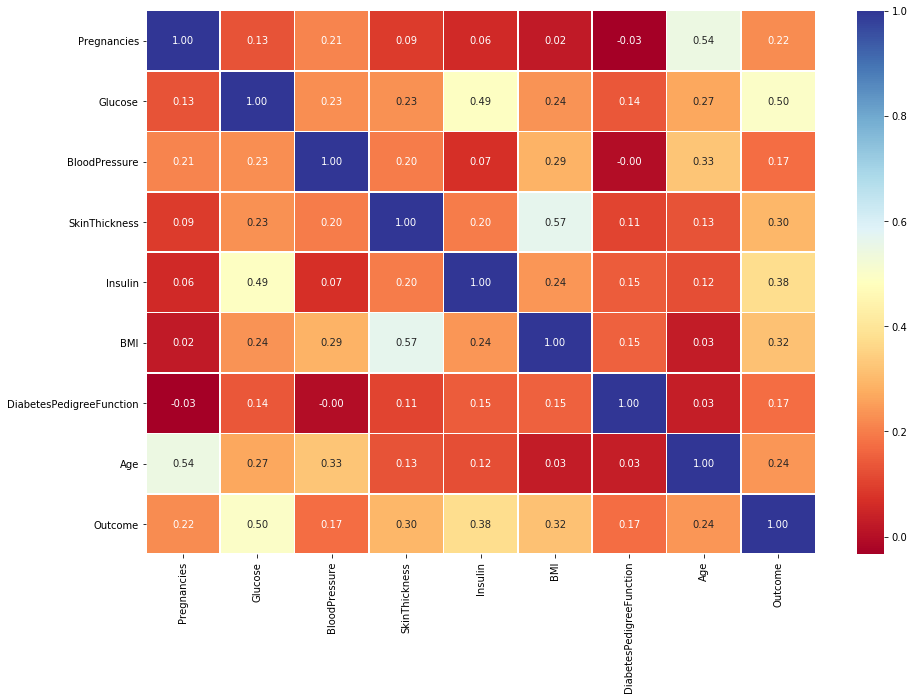

In [8]:
## It shows the correlation(positive,neagative) between different columns(only integer value columns) 
corr_matrix = data.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,annot=True,linewidth=0.5,fmt=".2f",cmap="RdYlBu")

###### Distribution of data set 

In [9]:
data.sample(frac=1)
X = data.drop("Outcome",axis=1)
y = data["Outcome"]
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.2)


# Models 

In [10]:

log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train,y_train);

## Evaluating the model
log_reg = log_reg.score(X_test,y_test)

## Build an model (KNN)
knn = KNeighborsClassifier()
knn.fit(X_train,y_train);
## Evaluating the model
knn = knn.score(X_test,y_test)


## Build an model (Random forest classifier)
clfm= RandomForestClassifier()
clfm.fit(X_train,y_train);
y_pred=clfm.predict(X_test)
## Evaluating the model
clf = clfm.score(X_test,y_test)
## Build an model (Support Vector Machine)
svm = SVC()
svm.fit(X_train,y_train)
## Evaluating the model
svm = svm.score(X_test,y_test)


##Build an model(Neural model )
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=200, batch_size=10)
_, nn_acc = model.evaluate(X_test, y_test)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Epoch 1/200
62/62 [==============================] - 0s 2ms/step - loss: 2.1908 - accuracy: 0.6173
Epoch 2/200
62/62 [==============================] - 0s 2ms/step - loss: 0.9984 - accuracy: 0.6042
Epoch 3/200
62/62 [==============================] - 0s 1ms/step - loss: 0.9223 - accuracy: 0.6140
Epoch 4/200
62/62 [==============================] - 0s 1ms/step - loss: 0.8226 - accuracy: 0.6319
Epoch 5/200
62/62 [==============================] - 0s 930us/step - loss: 0.7944 - accuracy: 0.6352
Epoch 6/200
62/62 [==============================] - 0s 917us/step - loss: 0.7238 - accuracy: 0.6498
Epoch 7/200
62/62 [==============================] - 0s 917us/step - loss: 0.7062 - accuracy: 0.6612
Epoch 8/200
62/62 [==============================] - 0s 772us/step - loss: 0.6731 - accuracy: 0.6840
Epoch 9/200
62/62 [==============================] - 0s 708us/step - loss: 0.6272 - accuracy: 0.6938
Epoch 10/200
62/62 [==============================] - 0s 676us/step - loss: 0.6558 - accuracy: 0.66

62/62 [==============================] - 0s 804us/step - loss: 0.4099 - accuracy: 0.8290
Epoch 83/200
62/62 [==============================] - 0s 676us/step - loss: 0.4126 - accuracy: 0.8306
Epoch 84/200
62/62 [==============================] - 0s 620us/step - loss: 0.3983 - accuracy: 0.8404
Epoch 85/200
62/62 [==============================] - 0s 724us/step - loss: 0.4175 - accuracy: 0.8257
Epoch 86/200
62/62 [==============================] - 0s 692us/step - loss: 0.3968 - accuracy: 0.8322
Epoch 87/200
62/62 [==============================] - 0s 842us/step - loss: 0.3907 - accuracy: 0.8371
Epoch 88/200
62/62 [==============================] - 0s 692us/step - loss: 0.4017 - accuracy: 0.8371
Epoch 89/200
62/62 [==============================] - 0s 660us/step - loss: 0.4082 - accuracy: 0.8371
Epoch 90/200
62/62 [==============================] - 0s 692us/step - loss: 0.4080 - accuracy: 0.8322
Epoch 91/200
62/62 [==============================] - 0s 1ms/step - loss: 0.3961 - accuracy: 0.

62/62 [==============================] - 0s 676us/step - loss: 0.3562 - accuracy: 0.8616
Epoch 163/200
62/62 [==============================] - 0s 772us/step - loss: 0.3555 - accuracy: 0.8485
Epoch 164/200
62/62 [==============================] - 0s 643us/step - loss: 0.3656 - accuracy: 0.8485
Epoch 165/200
62/62 [==============================] - 0s 686us/step - loss: 0.3546 - accuracy: 0.8518
Epoch 166/200
62/62 [==============================] - 0s 659us/step - loss: 0.3460 - accuracy: 0.8534
Epoch 167/200
62/62 [==============================] - 0s 660us/step - loss: 0.3455 - accuracy: 0.8632
Epoch 168/200
62/62 [==============================] - 0s 692us/step - loss: 0.3488 - accuracy: 0.8599
Epoch 169/200
62/62 [==============================] - 0s 1ms/step - loss: 0.3427 - accuracy: 0.8616
Epoch 170/200
62/62 [==============================] - 0s 1ms/step - loss: 0.3464 - accuracy: 0.8567
Epoch 171/200
62/62 [==============================] - 0s 1ms/step - loss: 0.3404 - accurac

In [11]:
print('Accuracy of Neural network: %.2f' % (nn_acc*100))
print('Accuracy of logistic regression : %.2f' % (log_reg*100))
print('Accuracy of Knn: %.2f' % (knn*100))
print('Accuracy of Random Forest Classifier : %.2f' % (clf*100))
print('Accuracy of SVM : %.2f' % (svm*100))



Accuracy of Neural network: 85.71
Accuracy of logistic regression : 81.82
Accuracy of Knn: 88.96
Accuracy of Random Forest Classifier : 88.31
Accuracy of SVM : 85.06


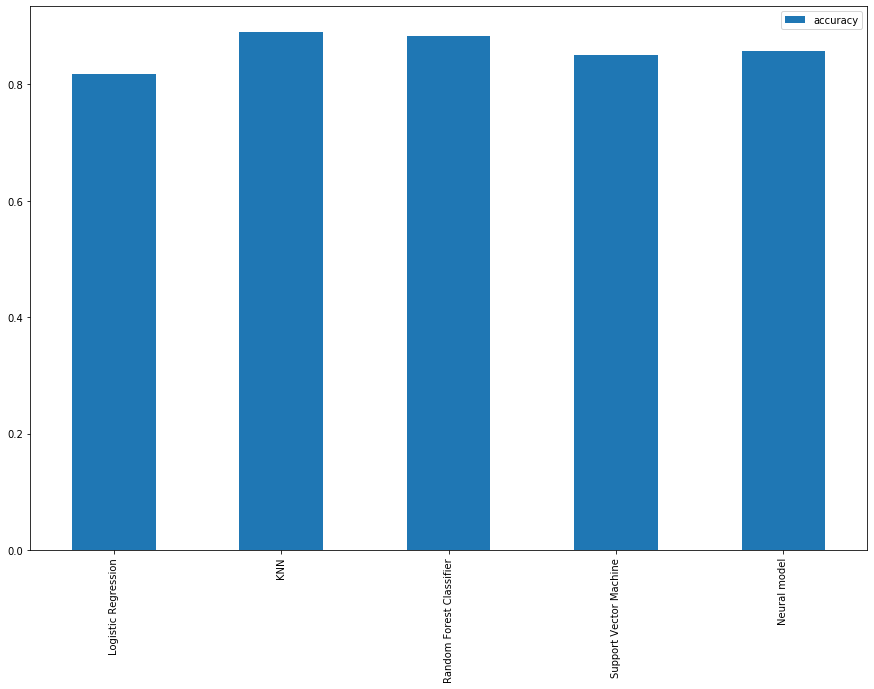

In [12]:
model_compare = pd.DataFrame({"Logistic Regression":log_reg,
"KNN":knn,
"Random Forest Classifier":clf,
"Support Vector Machine":svm,"Neural model":nn_acc},
index=["accuracy"])
model_compare.T.plot.bar(figsize=(15,10));

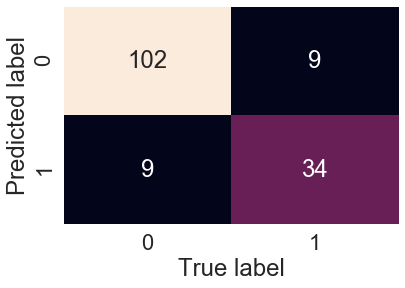

In [14]:

sns.set(font_scale=2)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True,cbar=False, fmt='g')
plt.xlabel("True label")
plt.ylabel("Predicted label");